In [1]:
import math
import numpy as np
import pandas as pd
import scipy
from scipy.special import erfc
from math import sqrt, exp
import matplotlib.pyplot as plt

%matplotlib inline

# Hantuh (1965)
# Streamflow depletion in fully penetrating stream with semipervious streambed.

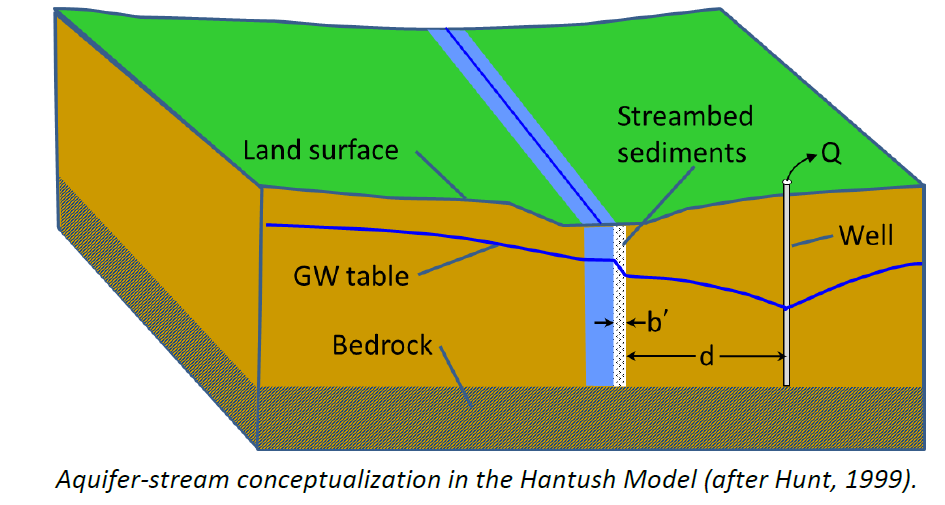

In [2]:
from IPython.display import Image 
pil_img = Image(filename='./Conceptual_models/Hantush1965.png')
display(pil_img)

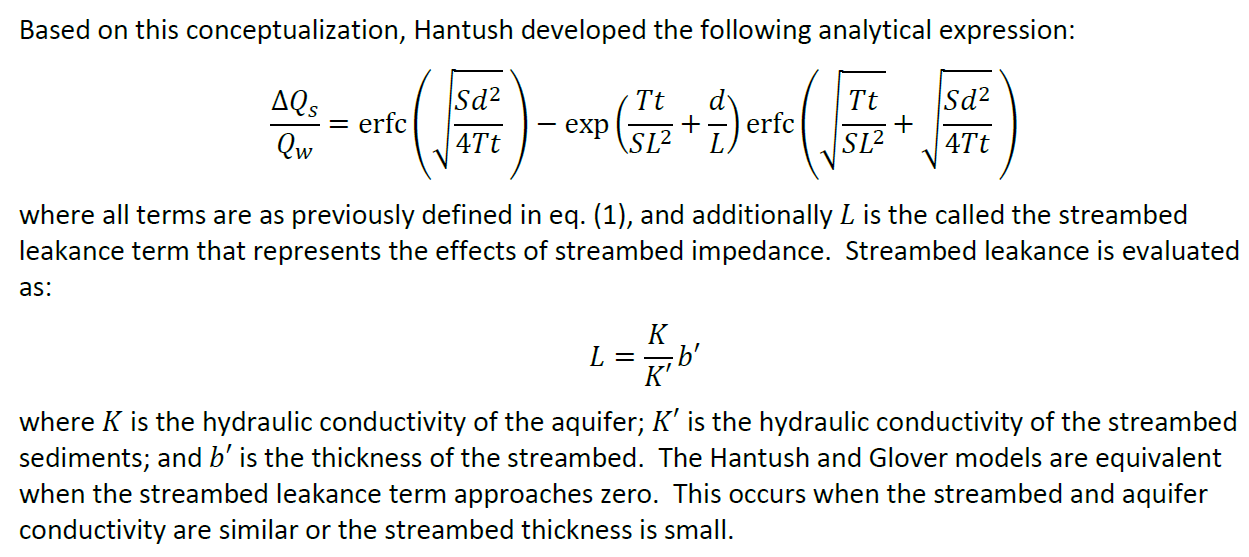

In [3]:
pil_img = Image(filename='./Conceptual_models/Hantush1965_f.png')
display(pil_img)

In [4]:
  # details This function is described in Hantush (1965). As the leakance term {(b*Kh/Kriv)}
  #approaches 0 this is equivalent to {glover}. It contains numerous assumptions:
  # itemize{
  # Horizontal flow >> vertical flow (Dupuit assumptions hold)
  # Homogeneous, isotropic aquifer
  # Constant {Tr}: Aquifer is confined, or if unconfined change in head is small relative to aquifer thickness
  # Stream is straight, infinitely long, and remains in hydraulic connection to aquifer
  # Constant stream stage
  # No changes in recharge due to pumping
  # No streambank storage
  # Constant pumping rate
  # Aquifer extends to infinity
  # }
  # return A numeric of \code{Qf}, streamflow depletion as fraction of pumping rate [-].
  # If the pumping rate of the well ({Qw}; [L3/T]) is known, you can calculate volumetric streamflow depletion [L3/T] as {Qf*Qw}
  # import From magrittr 
  # references
  # Hantush, MS (1965). Wells near Streams with Semipervious Beds. Journal of Geophysical Research 70(12): 2829-38. doi:10.1029/JZ070i012p02829.

In [5]:
    # constants
S = 0.14    # param S aquifer storage coefficient [](specific yield if unconfined; storativity if confined)
d = 693.35     # param d distance from well to stream [L]
# t = 365       # param t times you want output for [T]
Kh = 10    # param Kh aquifer horizontal hydraulic conductivity [L/T]
b = 300     # param b aquifer saturated thickness [L]
Kriv = 0.1  # param Kriv streambed semipervious layer hydraulic conductivity [L/T]
briv = 5    # param briv streambed semipervious layer thickness [L]

In [6]:
# Streambed Leakance
L = (Kh / Kriv) * briv
# Transmissivity
Tr = Kh * b

In [7]:
# pumping rate of the well ({Qw}; [L3/T])
df = pd.read_csv("daily_pumpings.csv", header=0)
df

,time,Pump_rate,base,time_2,diff
0,1,16761.11674,16761.11674,1.0,0.000000
1,2,16761.11674,16761.11674,2.0,0.000000
2,3,16761.11674,16761.11674,3.0,0.000000
3,4,16761.11674,16761.11674,4.0,0.000000
4,5,16761.11674,16761.11674,5.0,0.000000
...,...,...,...,...,...
360,361,17202.19876,16761.11674,26.0,441.082026
361,362,17202.19876,16761.11674,27.0,441.082026
362,363,17202.19876,16761.11674,28.0,441.082026
363,364,17202.19876,16761.11674,29.0,441.082026


In [8]:
# return SFD  for base(min) pumpings
df['capture1'] =  df['base'] *(erfc(np.sqrt(S * d ** 2 / (4 * Tr * df['time']))) - \
    np.exp((Tr * df['time']) / ((S * L **2)  + (d / L))) * erfc(np.sqrt((Tr * df['time']) \
    / (S * L **2)) + np.sqrt((S * d **2) / (4 * Tr * df['time']))))

In [9]:
# return SFD  to apply seasonlity pumpings
df['capture2'] =  df['diff'] *(erfc(np.sqrt(S * d ** 2 / (4 * Tr * df['time_2']))) - \
    np.exp((Tr * df['time_2']) / ((S * L **2)  + (d / L))) * erfc(np.sqrt((Tr * df['time_2']) \
    / (S * L **2)) + np.sqrt((S * d **2) / (4 * Tr * df['time_2']))))

In [10]:
df['capture']= df['capture1'] + df['capture2']
df

,time,Pump_rate,base,time_2,diff,capture1,capture2,capture
0,1,16761.11674,16761.11674,1.0,0.000000,10.521271,0.000000,10.521271
1,2,16761.11674,16761.11674,2.0,0.000000,237.116856,0.000000,237.116856
2,3,16761.11674,16761.11674,3.0,0.000000,716.874290,0.000000,716.874290
3,4,16761.11674,16761.11674,4.0,0.000000,1284.681034,0.000000,1284.681034
4,5,16761.11674,16761.11674,5.0,0.000000,1853.702604,0.000000,1853.702604
...,...,...,...,...,...,...,...,...
360,361,17202.19876,16761.11674,26.0,441.082026,14013.319274,202.421443,14215.740717
361,362,17202.19876,16761.11674,27.0,441.082026,14017.028326,205.926786,14222.955111
362,363,17202.19876,16761.11674,28.0,441.082026,14020.722398,209.279931,14230.002329
363,364,17202.19876,16761.11674,29.0,441.082026,14024.401592,212.491631,14236.893223


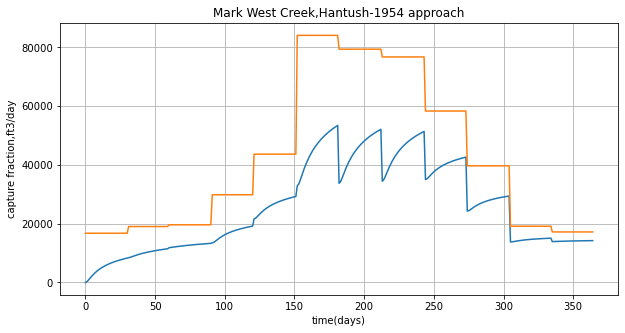

In [11]:
# SFD = streamflow depletion factor
fig = plt.figure(figsize=(10, 5))
plt.plot(df.capture)
plt.plot(df.Pump_rate)
plt.title("Mark West Creek,Hantush-1954 approach")
plt.xlabel('time(days)')
plt.ylabel('capture fraction,ft3/day')
plt.grid(True)

In [12]:
# Annual Capture fraction in acr.ft
Total = df['capture'].sum()
print(Total*2.29569e-5)

212.35626471343787


In [13]:
# np.savetxt("seasonality_Glover.csv", capture, delimiter="/")